In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

In [11]:
# direktori dataset
test_dir = 'test'
train_dir = 'train'
validation_dir = 'validation'

In [12]:
# List kelas sayuran
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage',
               'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato',
               'Pumpkin', 'Radish', 'Tomato']

In [13]:
# Data preprocessing dan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [14]:
# Bangun VGG Model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names), activation='softmax'))

In [15]:
# Freeze Convolutional Base
conv_base.trainable = False

In [16]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [17]:
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/30
468/468 [==============================] - 962s 2s/step - loss: 2.1213 - acc: 0.3419 - val_loss: 1.1536 - val_acc: 0.7769
Epoch 2/30
468/468 [==============================] - 426s 909ms/step - loss: 1.2668 - acc: 0.6350 - val_loss: 0.6778 - val_acc: 0.8585
Epoch 3/30
468/468 [==============================] - 431s 921ms/step - loss: 0.9618 - acc: 0.7243 - val_loss: 0.4831 - val_acc: 0.8995
Epoch 4/30
468/468 [==============================] - 433s 925ms/step - loss: 0.7882 - acc: 0.7710 - val_loss: 0.3872 - val_acc: 0.9180
Epoch 5/30
468/468 [==============================] - 428s 913ms/step - loss: 0.6740 - acc: 0.8103 - val_loss: 0.3126 - val_acc: 0.9325
Epoch 6/30
468/468 [==============================] - 429s 916ms/step - loss: 0.5870 - acc: 0.8316 - val_loss: 0.2739 - val_acc: 0.9355
Epoch 7/30
468/468 [==============================] - 488s 1s/step - loss: 0.5383 - acc: 0.8433 - val_loss: 0.2435 - val_acc: 0.9395
Epoch 8/30
468/468 [==============================] - 

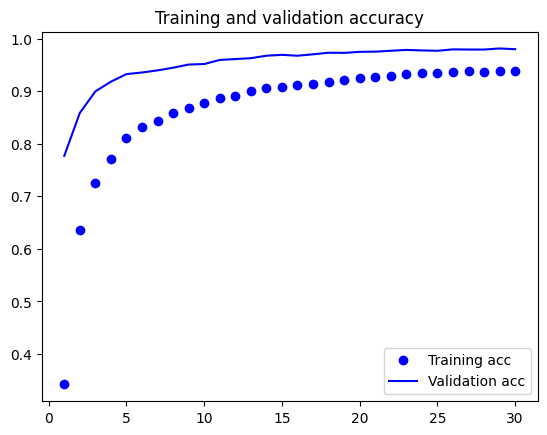

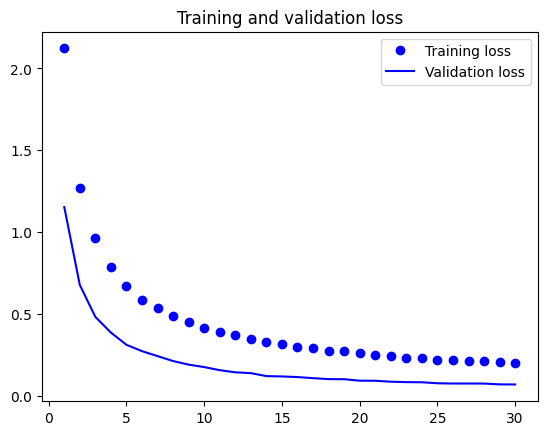

In [18]:
# Plot training and validation accuracy & loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Evaluate model on test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 3000 images belonging to 15 classes.
94/94 [==============================] - 110s 1s/step - loss: 0.0692 - acc: 0.9837
Test accuracy: 0.9836666584014893


In [20]:
# Save model
model.save('vegetable_classification_model.h5')

In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model


test_dir = 'test'
model_path = 'vegetable_classification_model.h5'


class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage',
               'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato',
               'Pumpkin', 'Radish', 'Tomato']


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


model = load_model(model_path)


test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


KeyboardInterrupt: 

In [4]:
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi
    return img_array

def predict_image_class(model, img_path, class_names):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    return class_names[predicted_class]


img_path = 'tomato.jpeg'  
predicted_class_name = predict_image_class(model, img_path, class_names)
print(f'The predicted class for the image is: {predicted_class_name}')

NameError: name 'model' is not defined

In [1]:
import tensorflow as tf

# Muat model dari file H5
model = tf.keras.models.load_model('vegetable_classification_model.h5')

# Konversi model ke format JSON
model_json = model.to_json()

# Simpan model JSON ke file
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
